In [1]:
import time
from utils import *
import pandas as pd
import random, os
import networkx as nx
plt.rcParams.update({'font.size': 15})

In [2]:
global it, level

sys.setrecursionlimit(20000)

def k_conn_min_deg_aux_min1(G, H, k, verbose=False, pre_min_deg=0):
    if verbose:
        global it, level
        it = it + 1
        level = level + 1
        print'  ' * level, "iteration =", it, "level =", level, "nodes =", len(G.nodes()), len(H.nodes())    
        print'  ' * level, "Computing %i-connected components..." % k
        
    if len(G.nodes)==0:
        return []
    cn = nx.core_number(H)
    deg = min(cn.values())
    if deg<=pre_min_deg:
        others = [ v for (v, i) in cn.iteritems() if i > pre_min_deg ]
        subgraphs = ([], k_conn_min_deg_aux_min1(G.subgraph(others), H.subgraph(others), k, verbose=verbose, pre_min_deg=pre_min_deg))
    else:
        
        comps = k_connected_components(G, k)
        if verbose: print("done")

        if comps == []:                 
            # No k-connected component: no solution
            return []                      
        elif len(comps) > 1 or len(comps[0]) != G.number_of_nodes():                   
            # G is not k-connected
            subgraphs = ( k_conn_min_deg_aux_min1(G.subgraph(c), H.subgraph(c), k, verbose=verbose, pre_min_deg=pre_min_deg) for c in comps )    
        else:                                   
            # G is k-connected
            # Remove the lowest core. This is better than just removing the lowest-degree vertex as it
            # avoids many useless computations of k-conected components
  
            others = [ v for (v, i) in cn.iteritems() if i > deg ]
            if verbose:
                print '  ' * level, 'connected component found', len(G.nodes()), min_deg(H), deg, len(others), max(cn.values())
            subgraphs = ( H.nodes(), k_conn_min_deg_aux_min1(G.subgraph(others), H.subgraph(others), k, verbose=verbose, pre_min_deg=deg) )
    subgraphs = [subgraph for subgraph in subgraphs if min_deg(H.subgraph(subgraph))>=1]
    if len(subgraphs)==0:
        return []
    # Return the best (highest min-degree) solution among those in subgraphs. Break ties by density.
    return max(subgraphs, key=lambda S: len(S) )                
        
def k_conn_min_deg_min1(G, H, k, verbose=False):    
    if verbose:
        global it, level
        it, level = 0, 0
    S = k_conn_min_deg_aux_min1(G, H.copy(), k, verbose=verbose)
    GS, HS, mindeg = G.subgraph(S), H.subgraph(S), min_deg(H.subgraph(S))
    assert GS.nodes() == HS.nodes()
    if verbose: print "size(S) =", len(S)
    assert S == [] or is_k_connected(G.subgraph(S), k)
    return S, mindeg

In [49]:
results = []
x1 = []
x2 = []
for k in [14]:
    print 'k=', k
    for cate in ['children']:
        print cate
        asds = os.listdir('data/'+cate+'/asd/')
        tds = os.listdir('data/'+cate+'/td/')
        sizes = [[], [], [], []]
        mindegs = [[], [], [], []]
        for g1 in tds:
            for g2 in tds:
                if g1==g2:
                    continue
                

                G1 = nx.from_pandas_adjacency(pd.read_csv('data/'+cate+'/td/'+g1, delimiter=' ', header=None))
                G2 = nx.from_pandas_adjacency(pd.read_csv('data/'+cate+'/td/'+g2, delimiter=' ', header=None))
                G1.remove_edges_from(nx.selfloop_edges(G1))
                G2.remove_edges_from(nx.selfloop_edges(G2))
                
                S, mindeg = k_conn_min_deg_min1(G2, G1, k, verbose=False)
                sizes[1].append(len(S))
                mindegs[1].append(mindeg)
                x1.append(len(S))
                
            for g3 in asds:
                G3 = nx.from_pandas_adjacency(pd.read_csv('../data/'+cate+'/asd/'+g3, delimiter=' ', header=None))
                G3.remove_edges_from(nx.selfloop_edges(G3))

#             S, mindeg = k_conn_min_deg_min1(G1, G2, k, verbose=False)
#             sizes[0].append(len(S))
#             mindegs[0].append(mindeg)

                S, mindeg = k_conn_min_deg_min1(G3, G1, k, verbose=False)
                sizes[2].append(len(S))
                mindegs[2].append(mindeg)
                x2.append(len(S))

#             S, mindeg = k_conn_min_deg_min1(G1, G3, k, verbose=False)
#             sizes[3].append(len(S))
#             mindegs[3].append(mindeg)
            print g1
#         results.append([np.average(sizes[0]), np.average(sizes[1]), np.average(sizes[2]), np.average(sizes[3])])
#         print np.average(sizes[0]), np.average(sizes[1]), np.average(sizes[2]), np.average(sizes[3])
#         print np.average(mindegs[0]), np.average(mindegs[1]), np.average(mindegs[2]), np.average(mindegs[3])


k= 14
children
Yale_0050576.txt
Stanford_0051180.txt
KKI_0050781.txt
SDSU_0050206.txt
OHSU_0050163.txt
KKI_0050786.txt
NYU_0051036.txt
USM_0050453.txt
UM_1_0050366.txt
NYU_0051079.txt
NYU_0051039.txt
NYU_0051082.txt
NYU_0051083.txt
NYU_0051041.txt
Stanford_0051190.txt
NYU_0051084.txt
NYU_0051081.txt
NYU_0051038.txt
KKI_0050784.txt
Yale_0050554.txt
MaxMun_d_0051360.txt
KKI_0050777.txt
Stanford_0051181.txt
Stanford_0051187.txt
Yale_0050560.txt
KKI_0050820.txt
NYU_0051078.txt
KKI_0050776.txt
NYU_0051042.txt
Stanford_0051184.txt
NYU_0051040.txt
NYU_0051064.txt
Stanford_0051188.txt
UCLA_1_0051278.txt
Pitt_0050054.txt
KKI_0050779.txt
KKI_0050789.txt
NYU_0051069.txt
OHSU_0050164.txt
UM_1_0050376.txt
Stanford_0051183.txt
NYU_0051070.txt
KKI_0050790.txt
KKI_0050814.txt
Yale_0050564.txt
OHSU_0050161.txt
OHSU_0050166.txt
Stanford_0051185.txt
Stanford_0051186.txt
NYU_0051080.txt
Stanford_0051189.txt
OHSU_0050162.txt


In [50]:
np.average(x1), np.average(x2)

(94.98567119155355, 89.8936420722135)

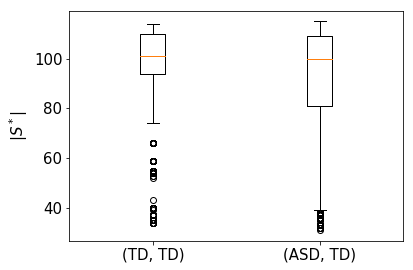

In [89]:
# fig = plt.figure(figsize =(6, 4)) 
  
# # # Creating axes instance 
# ax = fig.add_axes([0, 0, 1, 1]) 
data = [x1, x2]
# Creating plot 
plt.boxplot(data) 
plt.xticks([1,2],['(TD, TD)', '(ASD, TD)']) 
plt.ylabel(r'$|S^*|$')
# show plot 
plt.tight_layout()
plt.savefig('brain_k=14.png')
plt.show() 

In [53]:
results = []
x3 = []
x4 = []
for k in [14]:
    print 'k=', k
#     'adolescents', 'eyesclosed', 'male', 'children'
    for cate in ['children']:
        print cate
        asds = os.listdir('data/'+cate+'/asd/')
        tds = os.listdir('data/'+cate+'/td/')
        sizes = [[], [], [], []]
        mindegs = [[], [], [], []]
        for g1 in asds:
            for g2 in asds:
                if g1==g2:
                    continue
                

                G1 = nx.from_pandas_adjacency(pd.read_csv('data/'+cate+'/asd/'+g1, delimiter=' ', header=None))
                G2 = nx.from_pandas_adjacency(pd.read_csv('data/'+cate+'/asd/'+g2, delimiter=' ', header=None))
                G1.remove_edges_from(nx.selfloop_edges(G1))
                G2.remove_edges_from(nx.selfloop_edges(G2))
                
                S, mindeg = k_conn_min_deg_min1(G2, G1, k, verbose=False)
                sizes[1].append(len(S))
                mindegs[1].append(mindeg)
                x3.append(len(S))
                
            for g3 in tds:
                G3 = nx.from_pandas_adjacency(pd.read_csv('../data/'+cate+'/td/'+g3, delimiter=' ', header=None))
                G3.remove_edges_from(nx.selfloop_edges(G3))

#             S, mindeg = k_conn_min_deg_min1(G1, G2, k, verbose=False)
#             sizes[0].append(len(S))
#             mindegs[0].append(mindeg)

                S, mindeg = k_conn_min_deg_min1(G3, G1, k, verbose=False)
                sizes[2].append(len(S))
                mindegs[2].append(mindeg)
                x4.append(len(S))

#             S, mindeg = k_conn_min_deg_min1(G1, G3, k, verbose=False)
#             sizes[3].append(len(S))
#             mindegs[3].append(mindeg)
            print g1
#         results.append([np.average(sizes[0]), np.average(sizes[1]), np.average(sizes[2]), np.average(sizes[3])])
#         print np.average(sizes[0]), np.average(sizes[1]), np.average(sizes[2]), np.average(sizes[3])
#         print np.average(mindegs[0]), np.average(mindegs[1]), np.average(mindegs[2]), np.average(mindegs[3])


k= 14
children
UCLA_1_0051213.txt
Stanford_0051175.txt
KKI_0050802.txt
KKI_0050792.txt
UCLA_1_0051228.txt
KKI_0050803.txt
NYU_0051032.txt
NYU_0051011.txt
MaxMun_c_0051348.txt
Stanford_0051173.txt
Stanford_0051164.txt
Stanford_0051163.txt
NYU_0051013.txt
NYU_0051003.txt
NYU_0050965.txt
Yale_0050609.txt
KKI_0050795.txt
Pitt_0050013.txt
NYU_0050987.txt
NYU_0051010.txt
NYU_0050977.txt
UCLA_1_0051226.txt
OHSU_0050146.txt
MaxMun_d_0051353.txt
Stanford_0051160.txt
UCLA_1_0051249.txt
Yale_0050615.txt
Stanford_0051161.txt
KKI_0050825.txt
NYU_0050969.txt
Stanford_0051166.txt
KKI_0050804.txt
OHSU_0050150.txt
UM_1_0050308.txt
Yale_0050625.txt
Stanford_0051162.txt
Stanford_0051172.txt
MaxMun_d_0051352.txt
NYU_0050970.txt
NYU_0050952.txt
NYU_0051030.txt
KKI_0050793.txt
UM_1_0050318.txt
NYU_0050979.txt
UM_1_0050306.txt
NYU_0050982.txt
Yale_0050617.txt
NYU_0051002.txt
NYU_0050986.txt


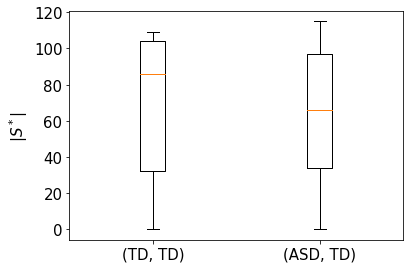

In [90]:
# fig = plt.figure(figsize =(6, 4)) 
  
# # # Creating axes instance 
# ax = fig.add_axes([0, 0, 1, 1]) 
data = [x3, x4]
# Creating plot 
plt.boxplot(data) 
plt.xticks([1,2],['(TD, TD)', '(ASD, TD)']) 
plt.ylabel(r'$|S^*|$')
# show plot 
plt.tight_layout()
plt.savefig('brain_k=15.png')
plt.show() 

In [56]:
np.average(x1), np.average(x2), np.average(x3), np.average(x4)

(94.98567119155355, 89.8936420722135, 89.89838435374149, 94.98979591836735)

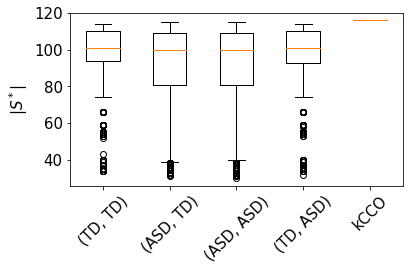

In [60]:
x5 = [116]
data = [x1, x2, x3, x4, x5]
# Creating plot 
plt.boxplot(data) 
plt.xticks([1,2,3,4,5],['(TD, TD)', '(ASD, TD)', '(ASD, ASD)', '(TD, ASD)', 'kCCO'], rotation=45) 
plt.ylabel(r'$|S^*|$')
# show plot 
plt.tight_layout()
plt.savefig('brain_k=14_full.png')
plt.show() 

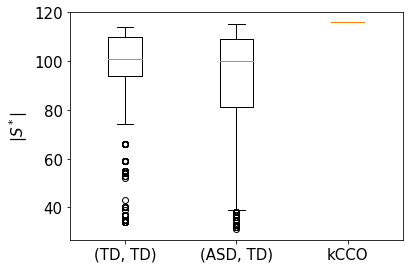

In [62]:
x5 = [116]
data = [x1, x2, x5]
# Creating plot 
plt.boxplot(data) 
plt.xticks([1,2,3],['(TD, TD)', '(ASD, TD)', 'kCCO']) 
plt.ylabel(r'$|S^*|$')
# show plot 
plt.tight_layout()
plt.savefig('brain_k=14.png')
plt.show() 

In [64]:
len1 = []
len2 = []
for cate in ['children']:
    print cate
    asds = os.listdir('data/'+cate+'/asd/')
    tds = os.listdir('data/'+cate+'/td/')
    sizes = [[], [], [], []]
    mindegs = [[], [], [], []]
    for g1 in asds:
        G1 = nx.from_pandas_adjacency(pd.read_csv('data/'+cate+'/asd/'+g1, delimiter=' ', header=None))
        G1.remove_edges_from(nx.selfloop_edges(G1))
        comps = k_connected_components(G1, 14)
        len1.append(len(comps[0]))
    for g2 in tds:
        G2 = nx.from_pandas_adjacency(pd.read_csv('data/'+cate+'/td/'+g2, delimiter=' ', header=None))
        G2.remove_edges_from(nx.selfloop_edges(G2))
        comps = k_connected_components(G2, 14)
        len2.append(len(comps[0]))

children


In [65]:
np.average(len1), np.average(len2)

(89.79591836734694, 94.9423076923077)